<small><i>Updated January 2019 - This notebook was created by [Santi Seguí](https://ssegui.github.io/). </i></small>

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;">
        <h2>Collaborative filtering:</h2>
         <br>
</div>

<br>
<center>Collaborative filtering methods are based on collecting and analyzing a large amount <br>of information on users’ behaviors, activities or preferences and predicting what users will like based on their similarity to other users. 
<br><br><b>Hyphothesis: Similar users tend to like similar items.</b>
<br><b>Problem: Requires a user community.</b>
<br>
</center>





It can be understood as a generalization of Supervised Classication:
<img src="images/colResSys.png" width=600>
<br>

<p><b>Several</b> methods but <b>one (or two main) </b> approaches
<ol>

<li>Memory-Based Methods (Neighborhood-based methods) </li>
<li>Model-Based Methods</li>
</ol>

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;"><a class="anchor" id="what-is-a-recommender"></a><h3>Neighborhood-based methods</h3><br></div>
<br>Two main types: User-based and Item-based.
        
* User-based CF works like this: take a user U and a set of other users D whose ratings are similar to the ratings of the selected user U and use the ratings from those like-minded users to calculate a prediction for the selected user U.

<img src=https://dataaspirant.files.wordpress.com/2015/01/userbased.png width=700>
<center>Original source: https://dataaspirant.files.wordpress.com</center>

* In Item-based CF you build an item-item matrix determining relationships between pairs of items and using this matrix and data on the current user, infer the user’s taste. Typicaly used in the domain: people who buy x also buy y
<img src="images/neighbourhood.png" width=600>

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
EXAMPLE: Movie Recommender System. User-Based Collaborative Filtering
</div>


## What do we need to build a Movie Recommendation System?

### Steps in order to create a CF - Recommender
+ Data recollection
+ Data filtering/cleaning
+ Item/user similarity function
+ Learning/Prediction funciton

Given an "active user" (Joan) and an item that has not been seen by the user, the goal is to estimate the rating for the item.
<table style="width:60%">
  <tr>
    <td></td>
    <td>Superman</td> 
    <td>Star Wars 1</td>
    <td>Matrix</td>
    <td>Spiderman</td>
    
  </tr>
  <tr>
    <td>Santi</td>
    <td>3</td> 
    <td>3.5</td>
    <td>4.5</td>
    <td><font color="red"><b>¿?</b></font></td>
  </tr>
  <tr>
    <td>User1</td>
    <td>3.5</td> 
    <td>4</td>
    <td>5</td>
    <td>5</td>
  </tr>
  <tr>
    <td>User2</td>
    <td>3</td> 
    <td><font color="red"><b>¿?</b></font></td>
    <td>4.5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>3.5</td> 
    <td>5</td>
    <td>3.5</td>
    <td>2</td>
  </tr>
</table>

<br><br><br><br>



### How to measure similarity between users?
The similarity computation between the items is one critical step in the CF algorithms. The basic idea in similarity computation between two users <i>a</i> and <i>b</i> is to first isolate the items commonly rated by both users (set <i>P</i>), and then to apply a similarity computation technique to determine the similarity.
    <ul>
    <li>Euclidean distance</li>
    $$sim(a,b) = \sqrt{\sum_{p \in P}{(r_{a,p} - r_{b,p})^2}}$$
    <br>
    <li>Pearson Correlation</li>
    $$sim(a,b) = \frac{\sum_{p\in P} (r_{a,p}-\bar{r_a})(r_{b,p}-\bar{r_b})}{\sqrt{\sum_{p \in P}(r_{a,p}-\bar{r_a})²}\sqrt{\sum_{p \in P}(r_{b,p}-\bar{r_b})²}}$$
    <br>
    <li>Cosine distance</li>
    $$ sim(a,b) = \frac{\vec{a}· \vec{b}}{|\vec{a}| * |\vec{b}|}$$
    <br>
    </ul>
<br>
Where: 

* $sim(a,b)$ is the similarity between user "a" and user "b"
* $P$ is the set of common rated movies by user "a" and "b"
* $r_{a,p}$ is the rating of movie "p" by user "a"
* $\bar{r_a}$ is the mean rating given by user "a"

<br>



<h3>Some issues to take into accout</h3>
<ul>
<li>Pearson Correlation used to work better than euclidean distance since it is based more on the ranking than on the values.</li>
<li>Cosine distance is usually used when our data is binary/unary, i.e. like vs. not like  or buy vs. not buy.</li>
<li>What happens if two users have very few items in common?</li>
</ul>


<h3>How do we generate a prediction from the neighbour's ratings?</h3><br>

$$pred(a,p) = \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p})}}{\sum_{b \in N}{sim(a,b)}}$$

Example:
<br>
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1})$</td>
    <td>Rating Movie2: $r_{b,p_2}$</td>
    <td>$sim(a,b)*(r_{b,p_2})$</td>
    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>3</td>
    <td>2.97</td>
    <td>2.5</td>
    <td>2.48</td>
    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>3</td>
    <td>1.14</td>
    <td>3</td>
    <td>1.14</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>4.5</td>
    <td>4.0</td>
    <td> - </td>
    <td> - </td>
  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3</td>
    <td>2.77</td>
    <td>3</td>
    <td>2.77</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p})}$</td>
    <td></td> 
    <td></td>
    <td>10.87</td>
    <td></td>
    <td>6.39</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td>3.18</td>
    <td></td>
    <td>2.29</td>
  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td>3.41</td>
    <td></td>
    <td>2.79</td>
  </tr>
</table>


<br>

<h3>Evaluation: performance criterion</h3>
Performance evaluation of recommendation systems is an entire topic all in itself. Some of the options include:<br>
* $RMSE = \sqrt{(\frac{\sum(\hat{y}-y)^2}{n})}$
<br>
* Precision / Recall / F-scores
* ROC curves
* Cost curves

In [1]:
def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2)))

#### Download Movilens Database
We will work with the well known MovieLens dataset (http://grouplens.org/datasets/movielens/). This dataset was initially constructed to support participants in the Netflix Prize. Today, we can find several versions of this dataset with different amout of data, from 100k samples version to 20m sample version. Although performance on bigger dataset is expected to be better, we will work with the smallest dataset: MovieLens 100K Dataset (ml-100k-zip). Working with this lite version has the benefit of less computational costs

With a unix machine the dataset can be downloaded with the following code:

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip 
!unzip ml-100k.zip -d "data/"

/bin/sh: wget: command not found
unzip:  cannot find or open ml-100k.zip, ml-100k.zip.zip or ml-100k.zip.ZIP.


If you are working with a windows machine, please go to the website and download the 100k version and extract it to the subdirectory named "data/ml-100k/"

Once you have downloaded and unzipped the file into a directory, you can create a DataFrame with the following code:

In [28]:
#NETFLIX REAL 50.000.000 usuaris and 100.000 items
%autosave 150
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

# Load Data set
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first three columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(3), encoding='latin-1')

# Construcció del DataFrame
data = pd.merge(pd.merge(ratings, users), movies)
data = data[['user_id','title', 'movie_id','rating','release_date','sex','age']]

print("La BD has "+ str(data.shape[0]) +" ratings")
print("La BD has ", data.user_id.nunique()," users")
print("La BD has ", data.movie_id.nunique(), " movies")
data.head()

Autosaving every 150 seconds
La BD has 100000 ratings
La BD has  943  users
La BD has  1682  movies


,user_id,title,movie_id,rating,release_date,sex,age
0,196,Kolya (1996),242,3,24-Jan-1997,M,49
1,305,Kolya (1996),242,5,24-Jan-1997,M,23
2,6,Kolya (1996),242,4,24-Jan-1997,M,42
3,234,Kolya (1996),242,4,24-Jan-1997,M,60
4,63,Kolya (1996),242,3,24-Jan-1997,M,31


## Let's first explore the data set
### Pandas and Python review


In [29]:
#### Create a function that allows us to divide the dataset into:
#### training and test
def assign_to_set(df):
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.2)),
                                   replace=False)
    df.loc[sampled_ids, 'for_testing'] = True
    return df

def create_train_test(data,key = 'user_id'):
    data['for_testing'] = False
    grouped = data.groupby(key, group_keys=False).apply(assign_to_set)
    # dataframe used to train our model
    data_train = data[grouped.for_testing == False]
    # dataframe used to evaluate our model
    data_test = data[grouped.for_testing == True]
    return data_train, data_test

data_train, data_test =  create_train_test(data)
print(data_train.shape, data_test.shape)

print("Training data_set has "+ str(data_train.shape[0]) +" ratings")
print("Test data set has "+ str(data_test.shape[0]) +" ratings")
print("La BD has ", data.movie_id.nunique(), " movies")

(79619, 8) (20381, 8)
Training data_set has 79619 ratings
Test data set has 20381 ratings
La BD has  1682  movies


#### How to get the set of movies from user with id  "1"?

In [5]:
data_train[data_train.user_id==1].head(5)

,user_id,title,movie_id,rating,release_date,sex,age,for_testing
417,1,Shall We Dance? (1996),251,4,11-Jul-1997,M,24,False
708,1,Ace Ventura: Pet Detective (1994),67,3,01-Jan-1994,M,24,False
940,1,Raising Arizona (1987),238,4,01-Jan-1987,M,24,False
1306,1,"Truth About Cats & Dogs, The (1996)",111,5,26-Apr-1996,M,24,False
1618,1,"Birdcage, The (1996)",25,4,08-Mar-1996,M,24,False


#### Mean Rating of movies seen by user "1"

In [6]:
data_train[data_train.user_id==1].rating.mean()

3.5668202764976957

#### Mean rating of movie with title "Seven (Se7en) (1995)"

In [7]:
data_train.rating[data_train.title=="Seven (Se7en) (1995)"].mean()

3.8870967741935485

#### Which are the 10 most rated movies?

In [8]:
data_train.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 460
Fargo (1996)                     413
Contact (1997)                   405
Return of the Jedi (1983)        383
English Patient, The (1996)      377
Scream (1996)                    377
Liar Liar (1997)                 366
Toy Story (1995)                 365
Air Force One (1997)             359
Independence Day (ID4) (1996)    349
dtype: int64

#### Which are the 10 movies with the highest score

In [9]:
data_train.groupby('title').rating.mean().sort_values(ascending=False).head(5)

title
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Prefontaine (1997)                                   5.0
Aiqing wansui (1994)                                 5.0
They Made Me a Criminal (1939)                       5.0
Star Kid (1997)                                      5.0
Name: rating, dtype: float64

In [10]:
data_train.groupby('title').rating.mean().sort_values().tail(5)

title
Star Kid (1997)                                      5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

#### Top movies rated more than 10 times

In [11]:
size = data_train.groupby('title').size()
mean_score = data_train.groupby('title').rating.mean()
mean_score[size>10].sort_values(ascending=False).head()

title
Close Shave, A (1995)                                     4.467391
Wrong Trousers, The (1993)                                4.459184
Schindler's List (1993)                                   4.448276
Casablanca (1942)                                         4.442786
Wallace & Gromit: The Best of Aardman Animation (1996)    4.421053
Name: rating, dtype: float64

#### Which is the distibution of rated movies per user?

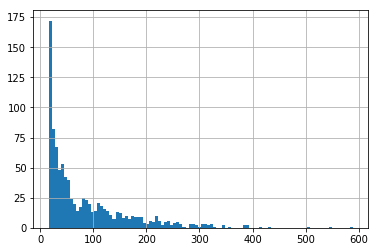

In [12]:
rated_movies = data_train.groupby('user_id').size().sort_values(ascending=False)
rated_movies.hist(bins=100)


#### Which is the mean movie scores per year?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3.3160556257901392, 4.388888888888889)

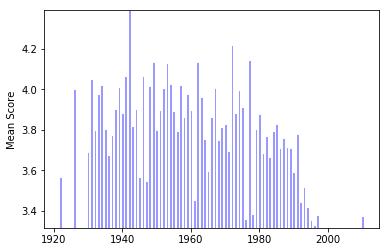

In [13]:
from math import isnan
data_train['release_year'] = data_train['release_date'].apply(lambda x: int(str(x)[-4:]) 
                                                                    if isnan(float(str(x)[-4:]))==False 
                                                                    else 2010)
rank_per_year = data_train.groupby('release_year')['rating'].mean()
plt.bar(rank_per_year.keys(), rank_per_year, facecolor='#9999ff', edgecolor='white')
plt.ylabel("Mean Score")
plt.ylim((min(rank_per_year),max(rank_per_year)))

#### Which movies are most controversial amongst different ages?

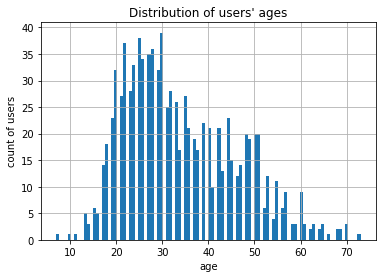

   movie_id  age age_group
0       242   49     40-49
1       242   23     20-29
2       242   42     40-49
4       242   31     30-39
5       242   26     20-29
          rating          
            size      mean
age_group                 
0-9           34  3.705882
10-19       6511  3.494394
20-29      31490  3.469260
30-39      20465  3.552407
40-49      11951  3.592670
50-59       6926  3.638464
60-69       2087  3.648778
70-79        155  3.625806


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
users.age.hist(bins=100)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')
plt.show()

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_train['age_group'] = pd.cut(data_train.age, range(0, 81, 10), right=False, labels=labels)
print(data_train[['movie_id','age', 'age_group']].head())

print(data_train.groupby('age_group').agg({'rating': [np.size, np.mean]}).copy())


#### Filter films that have received at least 250 ratings:

In [15]:
ratings_by_title = data.groupby('title').size()
print(ratings_by_title[ratings_by_title >= 250].head())

active_titles = ratings_by_title.index[ratings_by_title >= 250]
print(active_titles[:5])

title
2001: A Space Odyssey (1968)    259
Air Force One (1997)            431
Alien (1979)                    291
Aliens (1986)                   284
Amadeus (1984)                  276
dtype: int64
Index(['2001: A Space Odyssey (1968)', 'Air Force One (1997)', 'Alien (1979)',
       'Aliens (1986)', 'Amadeus (1984)'],
      dtype='object', name='title')


#### Obtain the mean ratings for each movie grouped by gender that have at least 250 ratings.

In [16]:
mean_ratings = data.pivot_table('rating', index='title',columns='sex', aggfunc='mean')
mean_ratings = mean_ratings.loc[active_titles]
print(mean_ratings[:10])


sex                                  F         M
title                                           
2001: A Space Odyssey (1968)  3.491228  4.103960
Air Force One (1997)          3.690476  3.606557
Alien (1979)                  3.660714  4.123404
Aliens (1986)                 3.672727  4.013100
Amadeus (1984)                4.038961  4.211055
Apollo 13 (1995)              4.000000  3.909953
Back to the Future (1985)     3.766667  3.857692
Birdcage, The (1996)          3.670455  3.346341
Blade Runner (1982)           3.979167  4.171806
Blues Brothers, The (1980)    3.782609  3.848780


#### Show films more valued by women.

In [17]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10].F

title
Schindler's List (1993)                   4.632911
Shawshank Redemption, The (1994)          4.562500
Usual Suspects, The (1995)                4.333333
Silence of the Lambs, The (1991)          4.320000
Titanic (1997)                            4.278846
Sense and Sensibility (1995)              4.252632
Star Wars (1977)                          4.245033
Fugitive, The (1993)                      4.166667
One Flew Over the Cuckoo's Nest (1975)    4.150000
Godfather, The (1972)                     4.133333
Name: F, dtype: float64

#### Now we wonder which movies are rated more differently between men and women. Which films have more different rating and are more highly valued by women? And the films preferred by men which doesn't liked women? What are the films that have generated the most discordant ratings, regardless of gender?

In [18]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
#Sort by'diff':  films have more different rating and are more highly valued by women
sorted_by_diff = mean_ratings.sort_values(by='diff')
print('Best for women\n')
print(sorted_by_diff[:5])

#Switching the order we get the films preferred by men which doesn't liked women
print('\nBest for men\n')
print(sorted_by_diff[:-5:-1])

# We can use standard deviation of the ratings to find the films that have generated the most discordant ratings, regardless of gender

# Standard deviation of rating grouped by title
print("\nMovies with highest controversy:")
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
print(rating_std_by_title.sort_values(ascending=False)[:5])

Best for women

sex                                         F         M      diff
title                                                            
Sense and Sensibility (1995)         4.252632  3.878613 -0.374019
Independence Day (ID4) (1996)        3.688679  3.356037 -0.332642
Birdcage, The (1996)                 3.670455  3.346341 -0.324113
Truth About Cats & Dogs, The (1996)  3.690722  3.371429 -0.319293
Rock, The (1996)                     3.879121  3.634146 -0.244975

Best for men

sex                                  F         M      diff
title                                                     
2001: A Space Odyssey (1968)  3.491228  4.103960  0.612732
Terminator, The (1984)        3.524590  4.037500  0.512910
Alien (1979)                  3.660714  4.123404  0.462690
Aliens (1986)                 3.672727  4.013100  0.340373

Movies with highest controversy:
title
Evita (1996)                   1.234051
Leaving Las Vegas (1995)       1.170368
English Patient, The (1996)    1.

#### Define a function called  <b>top_movies</b> that given a user it returns what movies have the highest rank for this user.

In [19]:
def top_movies(dataFrame,usr):
    max_i = dataFrame[dataFrame.user_id == usr].rating.max() 
    print("Max puntuation of user", usr, "is:", max_i)
    return dataFrame[(dataFrame['user_id'] == usr) & (dataFrame['rating'] == max_i )].title

print(top_movies(data,2))

Max puntuation of user 2 is: 5
32                        Kolya (1996)
424             Shall We Dance? (1996)
4627             Secrets & Lies (1996)
6455          L.A. Confidential (1997)
11911                     Fargo (1996)
32768            Godfather, The (1972)
33462                 Star Wars (1977)
55954                   Titanic (1997)
58130    Wings of the Dove, The (1997)
63360     Sense and Sensibility (1995)
71232         Good Will Hunting (1997)
78981                      Emma (1996)
82001        As Good As It Gets (1997)
Name: title, dtype: object


####  Which is the similarity between user 1 and user 2?
Let's look first for the common seen movies by the users

In [20]:
# dataframe with the data from user 1
data_user_1 = data_train[data_train.user_id==1]
# dataframe with the data from user 2
data_user_2 = data_train[data_train.user_id==2]
# We first compute the set of common movies
common_movies = set(data_user_1.movie_id).intersection(data_user_2.movie_id)
print("\nNumber of common movies",len(common_movies),'\n')

# creat the subdataframe with only with the common movies
mask = data_user_1.movie_id.isin(common_movies)
data_user_1 = data_user_1[mask]
print(data_user_1[['title','rating']].head())

mask = (data_user_2.movie_id.isin(common_movies))
data_user_2 = data_user_2[mask]
print(data_user_2[['title','rating']].head())


Number of common movies 9 

                         title  rating
1618      Birdcage, The (1996)       4
3479       Men in Black (1997)       4
5247   Mighty Aphrodite (1995)       5
6080    Full Monty, The (1997)       5
17406           Contact (1997)       5
                         title  rating
1648      Birdcage, The (1996)       4
3510       Men in Black (1997)       4
5270   Mighty Aphrodite (1995)       4
6129    Full Monty, The (1997)       4
17474           Contact (1997)       3


In [21]:
r = pd.merge(data_user_1[['user_id','movie_id','rating']],data_user_2[['user_id','movie_id','rating']],on='movie_id')
r.rating_y,r.rating_x

(0    4
 1    4
 2    4
 3    4
 4    3
 5    5
 6    4
 7    4
 8    5
 Name: rating_y, dtype: int64, 0    4
 1    4
 2    5
 3    5
 4    5
 5    5
 6    2
 7    5
 8    3
 Name: rating_x, dtype: int64)

#### Let's define a function to compute the users similarity 

In [22]:
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

# Returns a distance-based similarity score for person1 and person2
def SimEuclid(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id')    
    if len(rep)==0:
        return 0
    if(len(rep)<min_common_items):
        return 0
    #return distEuclid(rep['rating_x'],rep['rating_y']) 
    return 1.0/(1.0+euclidean(rep['rating_x'],rep['rating_y'])) 

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)==0:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    if(isnan(res)):
        return 0
    return res

print(SimPearson(data_train,1,2))
print(SimEuclid(data_train,1,2))

-0.2326252139407975
0.20521309615767264


<div class="alert alert-error" style = "border-radius:10px;border-width:3px;border-color:darkred;font-family:Verdana,sans-serif;">
<h2> Let's build the first CF-Recommender System</h2>
</div>


In [23]:
class CollaborativeFiltering:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame, similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df = DataFrame
        self.sim = {}

    def learn(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allUsers=set(self.df['user_id'])
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            df_user = data_train[data_train['user_id']==person1][['movie_id']]
            # Speedup trick - Dataframe that contain only those movies seen by person1
            data_reduced = pd.merge(data_train, df_user, on='movie_id')
            for person2 in allUsers:
                # no es comparem am nosalres mateixos
                if person1==person2: continue
                self.sim.setdefault(person2, {})
                if(person1 in self.sim[person2]):continue # since is a simetric matrix
                sim = self.sim_method(data_reduced,person1,person2)
                if(sim<0):
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
                
    def estimate(self, user_id, movie_id):
        ''' Estimate the rating of the movie_id for the user_id'''
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        allUsers=set(movie_users['user_id'])
        for other in allUsers:
            if user_id==other: continue 
            rating_num += self.sim[user_id][other] * float(movie_users[movie_users['user_id']==other]['rating'])
            rating_den += self.sim[user_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
        return rating_num/rating_den



#### Let's create a small dataset in order to reduce the computation cost and speedup the calculus in the class

In [24]:
dataSmall = data[data['user_id']<100].copy() # get only data from 100 users
print("Now this dataset contains", dataSmall.shape[0],'samples')

dataSmall_train, dataSmall_test =  create_train_test(dataSmall)

print("#Training samples = ",dataSmall_train.shape[0])
print("#Test samples = ",dataSmall_test.shape[0])
print('#Users =', dataSmall.user_id.nunique())
print('#Movies =',dataSmall.movie_id.nunique())

Now this dataset contains 10960 samples
#Training samples =  8727
#Test samples =  2233
#Users = 99
#Movies = 1232


In [25]:
reco = CollaborativeFiltering(dataSmall_train)
reco.learn()
reco.estimate(user_id=2,movie_id=1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


3.933908146955731

In [26]:
def evaluate(estimate_f,data_train,data_test):
    """ RMSE-based predictive performance evaluation with pandas. """
    ids_to_estimate = zip(data_test.user_id, data_test.movie_id)
    estimated = np.array([estimate_f(u,i) if u in data_train.user_id else 3 for (u,i) in ids_to_estimate ])
    real = data_test.rating.values
    return compute_rmse(estimated, real)

In [27]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco.estimate,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 1.2672904498291364


<h3><br><b>How improve the this recommender system?</b></h3>
<h4> 1) Normalization: Predicitions scaled to the user domain.</h4><br>
Users rate differntly, some rate high, while other low. This is the prediction function that was used in the original in Netflix system. Using this function we are scaling the prediction to our mean.<br>

$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$
<br>


Example:<br>
Preciction for the user "a" with  $\bar{r_a} = 3.5$
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Mean Ratings: $\bar{r_b}$</td>
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1}-\bar{r_b})$</td>

    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>4.3</td> 
    <td>3</td>
    <td>-1.28</td>

    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>2.73</td> 
    <td>3</td>
    <td>0.10</td>

  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>3.12</td>  
    <td>4.5</td>
    <td>1.22</td>

  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3.98</td>  
    <td>3</td>
    <td>-0.90</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>-1.13</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.84</td>

  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.20</td>

  </tr>
</table>


<h4> 2) Not all neighbor rating might be equally.</h4><br>
Agreeement on commonly liked items is not as important as agreeement on controversial items. we can give a weigth correlated with the rating variance.

<h4> 3) Value of number of co-rated items</h4>
Reduce the similarity between users when the number of co-rated items is low or discard those users with a small number of co-rated items

<h4> 4) Case amplificiation </h4>
Increase the weigth to those users which are really really similars (~= 1)

<h4> 5) Neighborhood selection</h4>
Only a subset of similar user used to be used. Not-similar users used to be discarded

<h4> 6) Recursive Methods</h4>
In order to avoid cold-start we can apply a recursive method for new users.






<h3>Problems:</h3><br>
<ul>
<li>"Memory-based" approach</li>
<li>Need to be trained offline and updateted periodically</li>
</ul>

<div class  = "alert alert-success">**EXERCISE 1**<p>
Modify the Recomender System using as a prediction function the following equation:
$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$

</div>

<div class="alert alert-success">
**EXERCISE 2:**<br>
Modify the recomender system from the previous exercice, with one that in order to estimate the score of a movie B for the user A only uses the subset of the N most similar users to user A. Define N as a parameter of the Recoomender.
</div>

<div class  = "alert alert-success">**EXERCISE 3**<p>
Modify the similarity function with the following:
$$new\_sim(a,b) = sim(a,b) * \frac{min(50,|P_{ab}|)}{50} $$
where $|P_{ab}|$ is the number of common items with user $a$ and user $b$
</div>